<a href="https://colab.research.google.com/github/yogaap113/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-1/blob/main/Case_Study_03_Data_Mining_UIN_Ganjil_2022_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laporan Market Basket Analysis Toko Alfalndo Cabang UIN Ciputat

AlfaIndo adalah sebuah toko waralaba yang memiliki beberapa cabang di kota-kota besar di Indonesia seperti Jakarta, Depok, Tangerang, Surabaya, dan Medan

In [103]:
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.7/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
# Import modul yang akan digunakan

import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [122]:
# Import data 
df = pd.read_csv('https://raw.githubusercontent.com/yogaap113/Case-Study-03-Data-Mining-UIN-Ganjil-2022-Kelompok-1/main/Kasus-AR-MBA-Ganjil-2022-UIN.csv')
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,7/1/22 0:00,Mr. A,1,Roti,Sri Roti,2
1,1,7/2/22 0:00,Mr. A,2,Air Minum,Aquos,1
2,1,7/3/22 0:00,Mr. A,11,Mie Instan,Indomi,2
3,1,7/4/22 0:00,Mr. A,12,Mie Instan,Mi Sedap,1
4,2,7/1/22 0:00,Mr. B,2,Air Minum,Aquos,1
5,2,7/2/22 0:00,Mr. B,6,Snack,Chiki,2
6,2,7/3/22 0:00,Mr. B,3,Roti,Prambanan,1
7,2,7/4/22 0:00,Mr. B,5,Shampoo,Clean,1
8,3,7/2/22 0:00,Mr. C,4,Sabun,Lifboy,1
9,3,7/3/22 0:00,Mr. C,5,Shampoo,Clean,1


In [106]:
# Cek kolom dan baris data
N, P = df.shape
print(f"Baris: {N}, kolom: {P}")

Baris: 56, kolom: 7


##Preprocessing Data

In [108]:
# Cek missing value pada data
df.isnull().sum()

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

Terlihat tidak ada missing value pada data

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


Berdasarkan output di atas terlihat bahwa terdapat beberapa kesalahan pada tipe data. Setelah kami periksa, ternyata
pada kolom 'Tanggal' terdapat kesalahan input data sehingga masih bertipe data int64, yang seharusnya 'Tanggal'
bertipe data datetime. Pada kolom 'Konsumen' masih bertipe data object seharusnya category, pada kolom 'Nama Produk' masih bertipe data object seharusnya category, dan pada kolom 'Merek' masih bertipe data object seharusnya category. Sehingga kami perlu
perbaiki terlebih dahulu data tersebut.

In [110]:
# Mengubah variabel data dari object ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 3.2+ KB


In [111]:
# Mengubah tipe data object/int64 menjadi category
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     int64         
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     category      
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     category      
 5   Merek         56 non-null     category      
 6   Jumlah        56 non-null     int64         
dtypes: category(3), datetime64[ns](1), int64(3)
memory usage: 3.2 KB


Berdasarkan output diatas terlihat bahwa tipe data sudah sesuai.

In [113]:
df.duplicated().sum()


0

Text(0.5, 0, 'ID Transaksi')

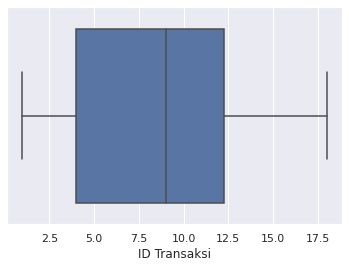

In [124]:
# Cek outlier 
# Outlier di variabel 
ax = sns.boxplot(x=df["ID Transaksi"])
ax.set_xlabel('ID Transaksi')

### Grouping Data

In [115]:
grouped_produk = df.groupby(['Nama Produk'])
produk_roti = grouped_produk.get_group('Roti')
produk_roti.head()


,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1,2022-07-01,Mr. A,1,Roti,Sri Roti,2
6,2,2022-07-03,Mr. B,3,Roti,Prambanan,1
11,4,2022-07-02,Mr. B,1,Roti,Sri Roti,2
27,9,2022-07-05,Mr. X,1,Roti,Sri Roti,2
33,10,2022-07-05,Mr. T,3,Roti,Prambanan,1


In [116]:
grouped_produk = df.groupby(['Nama Produk'])
produk_air = grouped_produk.get_group('Air Minum')
produk_air.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
1,1,2022-07-02,Mr. A,2,Air Minum,Aquos,1
4,2,2022-07-01,Mr. B,2,Air Minum,Aquos,1
12,4,2022-07-03,Mr. B,10,Air Minum,Sprit,2
17,5,2022-07-04,Mr. A,10,Air Minum,Sprit,2
21,7,2022-07-04,Mr. Z,10,Air Minum,Sprit,1


In [117]:
grouped_produk = df.groupby(['Nama Produk'])
produk_mie = grouped_produk.get_group('Mie Instan')
produk_mie.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
2,1,2022-07-03,Mr. A,11,Mie Instan,Indomi,2
3,1,2022-07-04,Mr. A,12,Mie Instan,Mi Sedap,1
15,4,2022-07-06,Mr. B,12,Mie Instan,Mi Sedap,2
18,6,2022-07-03,Mr. D,11,Mie Instan,Indomi,2
26,8,2022-07-07,Mr. B,11,Mie Instan,Indomi,3


In [118]:
grouped_produk = df.groupby(['Nama Produk'])
produk_snack = grouped_produk.get_group('Snack')
produk_snack.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
5,2,2022-07-02,Mr. B,6,Snack,Chiki,2
13,4,2022-07-04,Mr. B,8,Snack,Citata,3
16,5,2022-07-03,Mr. A,6,Snack,Chiki,1
23,8,2022-07-04,Mr. B,6,Snack,Chiki,1
30,9,2022-07-08,Mr. X,6,Snack,Chiki,2


In [119]:
grouped_produk = df.groupby(['Nama Produk'])
produk_shampoo = grouped_produk.get_group('Shampoo')
produk_shampoo.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
7,2,2022-07-04,Mr. B,5,Shampoo,Clean,1
9,3,2022-07-03,Mr. C,5,Shampoo,Clean,1
20,6,2022-07-05,Mr. D,5,Shampoo,Clean,1
25,8,2022-07-06,Mr. B,5,Shampoo,Clean,1
39,12,2022-07-07,Mr. G,5,Shampoo,Clean,1


In [120]:
grouped_produk = df.groupby(['Nama Produk'])
produk_sabun = grouped_produk.get_group('Sabun')
produk_sabun.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
8,3,2022-07-02,Mr. C,4,Sabun,Lifboy,1
14,4,2022-07-05,Mr. B,7,Sabun,Luks,1
19,6,2022-07-04,Mr. D,4,Sabun,Lifboy,1
24,8,2022-07-05,Mr. B,7,Sabun,Luks,1
29,9,2022-07-07,Mr. X,4,Sabun,Lifboy,1


In [121]:
grouped_produk = df.groupby(['Nama Produk'])
produk_rokok = grouped_produk.get_group('Rokok')
produk_rokok.head()

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
10,3,2022-07-04,Mr. C,9,Rokok,Malioboro,1
22,7,2022-07-05,Mr. Z,9,Rokok,Malioboro,1
31,9,2022-07-09,Mr. X,9,Rokok,Malioboro,1
37,11,2022-07-07,Mr. P,9,Rokok,Malioboro,1
48,15,2022-07-08,Mr. F,9,Rokok,Malioboro,1


## EDA


## Saran dan Kesimpulan